Luis Aldair Hernández Martínez 1616940

Estadistica Aplicada Grupo: 051

In [5]:
#1
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

In [6]:
#2 importamos datos
churn = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
#Mostramos las variables descritas 
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Convertiremos la variable TotalCharges a numérica
churn['TotalCharges'] = pd.to_numeric(churn.TotalCharges, errors='coerce')

In [9]:
#Verificamos si hay espacios en blanco
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#3 Determinamos los NAN
churn[churn.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
#observamos a los individuos que tienen cero meses de contrato con la empresa
churn[churn["tenure"] == 0]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
#Seleccionamos los que no son missing values de la variable TotalCharges
churn = churn.dropna(subset=['TotalCharges'])


In [13]:
#4 Eliminamos duplicados
churn.drop_duplicates(inplace=True)

In [14]:
#5
#creamos una lista de esas variables
sino = [ 'Partner', 'Dependents','Churn']
#creamos un for para convertirlas juntas, cuando diga yes a 1 y cuando digan No a 0
for i in sino:
 churn[i] = churn[i].map({'Yes':1, 'No':0})

In [15]:
#6 Veamos las estadísticas descriptivas de las variables numéricas y dummys
churn.describe()

,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,64.798208,2283.300441,0.265785
std,0.368844,0.499729,0.457629,24.545260,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000,1.000000


Las estadisticas nos muestran los detalles de las estadisticas básicas, tales como el conteo, la media generada, su desviación estandar 
y los percentiles, éstos datos, son generados para c/u de las variables que tenemos en nuestra base de datos

In [16]:
#7 Calcula el tiempo promedio que duran subscritos los clientes
churn["tenure"].mean()

32.421786120591584

In [17]:
kmf = KaplanMeierFitter()

<AxesSubplot:xlabel='timeline'>

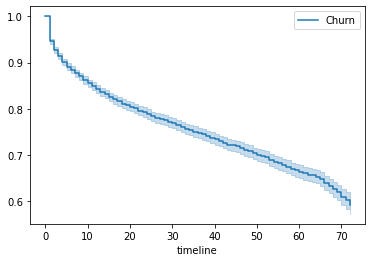

In [18]:
kmf.fit(churn['tenure'], churn['Churn'], label = "Churn").plot()

In [20]:
#Calculamos la funcion de supervivencia
kmf.survival_function_

,Churn
timeline,
0.0,1.000000
1.0,0.945961
2.0,0.927835
3.0,0.913725
4.0,0.901045
...,...
68.0,0.626858
69.0,0.620135
70.0,0.609657


In [28]:
kmf.median_survival_time_

inf

En este caso quereoms obtener la mediana del tiempo de supervivencia, es decir, el punto en el tiempo en el que en promedio el 50% de los clientes sobreviven
Con el comando anterior deberiamos obtenerla, sin embargo, en este caso, el comando devuelve inf, lo que nos indica que en la curva de supervivencia que en realidad no observamos ese punto en nuestros datos.

In [30]:
#8 Calculamos la mediana de los cargos mensuales
churn["MonthlyCharges"].median()

70.35

In [33]:
mucho = churn[churn['MonthlyCharges'] > 70.35]
poco = churn[churn['MonthlyCharges'] <= 70.35]

tm = mucho['tenure']
cm = mucho['Churn']

tp = poco['tenure']
cp = poco['Churn']

In [34]:
kmf.fit(tm, cm, label = "mucho")

<lifelines.KaplanMeierFitter:"mucho", fitted with 3513 total observations, 2276 right-censored observations>

In [35]:
kmf.survival_function_


,mucho
timeline,
0.0,1.000000
1.0,0.957301
2.0,0.938069
3.0,0.923023
4.0,0.907532
...,...
68.0,0.556350
69.0,0.547359
70.0,0.536163


In [36]:
kmf.fit(tp, cp, label = "poco")

<lifelines.KaplanMeierFitter:"poco", fitted with 3519 total observations, 2887 right-censored observations>

In [23]:
kmf.survival_function_

,low
timeline,
0.0,1.000000
1.0,0.934641
2.0,0.917669
3.0,0.904555
4.0,0.894942
...,...
68.0,0.752381
69.0,0.752381
70.0,0.745249


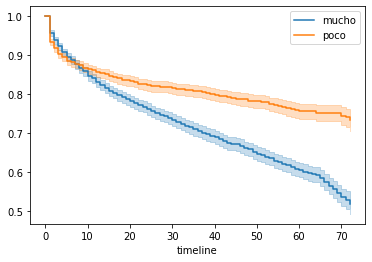

In [37]:
ax = plt.subplot(111)
ax = kmf.fit(tm, cm, label = "mucho").plot(ax=ax)
ax = kmf.fit(tp, cp, label = "poco").plot(ax=ax)

In [38]:
results = logrank_test(tm, tp, event_observed_A = cm, event_observed_B = cp)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          91.85 <0.005     69.86

## H0: Las funciones de supervivencias de los que pagan poco y de los que pagan mucho son distintas.

## H1: Las funciones de supervivencias de los que pagan poco y de los que pagan mucho NO son distintas.

### Al realizar la prueba logrank_test podemos observar un P-Valor menor a .05 lo cual nos indica que no podemos rechazar la hipotesis nula 
### Por tanto concluimos que la cantidad de pago si influye en la supervivencia del cliente



In [40]:
#9
dsl = churn[churn['InternetService'] == "DSL"]
fo = churn[churn['InternetService'] == "Fiber optic"]
no = churn[churn['InternetService'] == "No"]

tdsl = dsl['tenure']
cdsl = dsl['Churn']

tfo = fo['tenure']
cfo = fo['Churn']

tno = no['tenure']
cno = no['Churn']

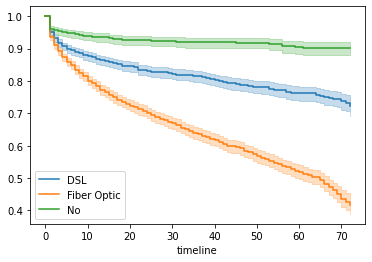

In [41]:
ax = plt.subplot(111)
ax = kmf.fit(tdsl, cdsl, label = "DSL").plot(ax=ax)
ax = kmf.fit(tfo, cfo, label = "Fiber Optic").plot(ax=ax)
ax = kmf.fit(tno, cno, label = "No").plot(ax=ax)

Basandonos en la grafica anterior, podemos obbservar lo siguiente


1.- Los clientes que no tienen internet, son mas constantes, es decir, generan menos abandono a la empresa


2.- Los clientes que mas abandonan son los que tienen fibra optica 

Lo anterior, puede significar que la fibra optica presenta muchas fallas en el servicio de internet

In [42]:
#10 Transformamos todas las variables categóricas
categoricas = ['gender','PhoneService','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling', 'PaymentMethod']
for i in categoricas:
    churn[i] = churn[i].astype('category')
    churn[i] = churn[i].cat.codes

In [43]:
#Estimamos el modelo de Cox
cph = CoxPHFitter()

In [44]:
churn.drop('customerID', inplace=True, axis=1)


In [45]:
cph.fit(churn, duration_col='tenure', event_col='Churn')


<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>

In [46]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -12679.32
         time fit was run = 2022-05-18 20:30:07 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
gender            -0.04       0.96       0.05            -0.13             0.05                 0.88                 1.05
SeniorCitizen      0.04       1.04       0.06            -0.07             0.15                 0.93                 1.16
Partner           -0.18       0.84       0.05            -0.28            -0.07                 0.75                 0.93
Dependents        -0.09       0.91       0.07            -0.23             0.04                 0.80                 1.04
PhoneService      -0.21       0.81       0.12            -0.44             0.02                 0.64                 1.02
MultipleLines     -0.08       0.92       0.03            -0.13            -0.03                 0.88                 0.97
InternetService   -0.20       0.82       0.06            -0.31            -0.08                 0.73                 0.92
OnlineSecurity    -0.22       0.80       0.03            -0.29            -0.16                 0.75                 0.85
OnlineBackup      -0.15       0.86       0.03            -0.20            -0.09                 0.82                 0.91
DeviceProtection  -0.07       0.93       0.03            -0.13            -0.02                 0.88                 0.98
TechSupport       -0.16       0.85       0.03            -0.23            -0.10                 0.80                 0.91
StreamingTV       -0.09       0.91       0.03            -0.15            -0.04                 0.86                 0.96
StreamingMovies   -0.09       0.91       0.03            -0.15            -0.04                 0.86                 0.96
Contract          -1.63       0.20       0.08            -1.79            -1.47                 0.17                 0.23
PaperlessBilling   0.15       1.17       0.06             0.04             0.26                 1.04                 1.30
PaymentMethod      0.20       1.22       0.03             0.15             0.25                 1.16                 1.29
MonthlyCharges     0.06       1.06       0.00             0.06             0.07                 1.06                 1.07
TotalCharges      -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

                   cmp to      z      p   -log2(p)
covariate                                         
gender               0.00  -0.91   0.36       1.46
SeniorCitizen        0.00   0.69   0.49       1.02
Partner              0.00  -3.20 <0.005       9.48
Dependents           0.00  -1.33   0.18       2.45
PhoneService         0.00  -1.81   0.07       3.84
MultipleLines        0.00  -2.97 <0.005       8.37
InternetService      0.00  -3.39 <0.005      10.46
OnlineSecurity       0.00  -6.69 <0.005      35.40
OnlineBackup         0.00  -5.45 <0.005      24.24
DeviceProtection     0.00  -2.72   0.01       7.25
TechSupport          0.00  -5.02 <0.005      20.90
StreamingTV          0.00  -3.29 <0.005       9.98
StreamingMovies      0.00  -3.25 <0.005       9.77
Contract             0.00 -19.77 <0.005     286.45
PaperlessBilling     0.00   2.72   0.01       7.27
PaymentMethod        0.00   7.31 <0.005      41.71
MonthlyCharges       0.00  27.12 <0.005     535.51
TotalCharges         0.00 -38.96 <0.005        inf
---
Concordance = 0.93
Partial AIC = 25394.64
log-likelihood ratio test = 5947.44 on 18 df
-log2(p) of ll-ratio test = inf

<AxesSubplot:xlabel='log(HR) (95% CI)'>

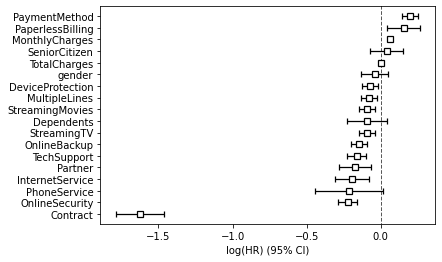

In [47]:
cph.plot()

Verificando los datos obtenidos en el modelo de Cox observamos que las variables que pueden influir como riesgos a la empresa son:

1.- Si el cliente es adulto mayor

2.- La transparencia al recibir facturas de pago manera constante

3.- Los metodos de pago obsoletos

Asimismo, al revisar el coeficiente de MonthlyCharges, pbservamos que tambien coincide con lo hallado en el punto 8

## #11 ¿Qué estrategias podría seguir la empresa para tratar de conservar a sus clientes?
Tener un buen equipo de trabajo tanto para atencion a cliente como para soporte tecnico 

Verificar cual es el motivo exacto por el cual hay inconformidad con la fibra optica

Ofrecer distintos beneficios segun la edad del contratante 

Algun ajuste de precios para evitar facturas mayores y promover el abandono 
